<a href="https://colab.research.google.com/github/S3GFelipe/MVP4/blob/main/MVP4_FELIPE_ANDRADE_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importações



In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import recall_score



Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/S3GFelipe/MVP4/main/MVP4/api/database/manutencao_preventiva2.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()


,TemperaturaDoAr[°C],TemperaturaDoProcesso[°C],VelocidadeDeRotacao[rpm],Torque[Nm],DesgasteDaFerramenta[min],Saida
0,24,95,1551,42.8,0,0
1,25,5,1408,46.3,3,0
2,24,95,1498,49.4,5,0
3,25,5,1433,39.5,7,0
4,25,5,1408,40.0,9,0


In [ ]:
print(dataset.columns)

Index([' TemperaturaDoAr[°C]', ' TemperaturaDoProcesso[°C]',
       ' VelocidadeDeRotacao[rpm]', ' Torque[Nm]',
       ' DesgasteDaFerramenta[min]', ' Saida'],
      dtype='object')


Tratamento de dados utilizando funções como undersampling e oversampling

In [ ]:
 # Undersampling
data_majority = dataset[dataset[' Saida'] == 0]
data_minority = dataset[dataset[' Saida'] == 1]

data_majority_downsampled = resample(data_majority, replace=False, n_samples=len(data_minority), random_state=7)

dataset_downsampled = pd.concat([data_majority_downsampled, data_minority])

X_downsampled = dataset_downsampled.iloc[:, :-1]
y_downsampled = dataset_downsampled.iloc[:, -1]

X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(
    X_downsampled, y_downsampled, test_size=0.20, shuffle=True, random_state=7, stratify=y_downsampled
)

Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20  # tamanho do conjunto de teste
seed = 7  # semente aleatória

# Utilizando os conjuntos downsapled para treinamento e teste
X_train = X_train_downsampled
X_test = X_test_downsampled
y_train = y_train_downsampled
y_test = y_test_downsampled

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)  # validação cruzada com estratificação


Modelagem e Inferência


Criação e avaliação de modelos: linha base

KNN: 0.811852 (0.029294)
CART: 0.861515 (0.049871)
NB: 0.808114 (0.041380)
SVM: 0.824545 (0.071996)


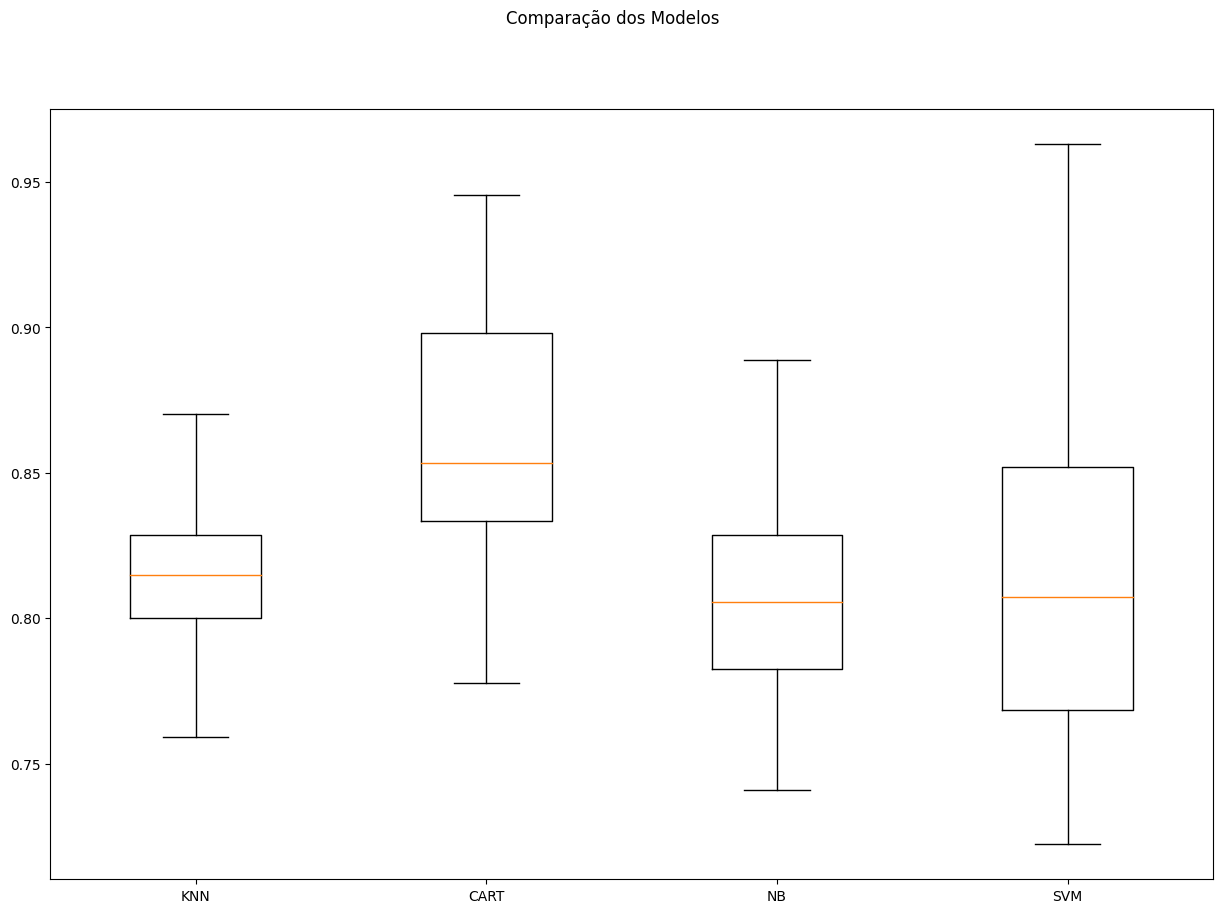

In [ ]:
np.random.seed(7)  # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Aplicando Recall

In [ ]:
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    # Adicionando cálculo do recall
    recall_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    msg_recall = "Recall - %s: %f (%f)" % (name, recall_results.mean(), recall_results.std())
    print(msg_recall)

KNN: 0.811852 (0.029294)
Recall - KNN: 0.837698 (0.070482)
CART: 0.863468 (0.048817)
Recall - CART: 0.849074 (0.061426)
NB: 0.808114 (0.041380)
Recall - NB: 0.786376 (0.077367)
SVM: 0.824545 (0.071996)
Recall - SVM: 0.885714 (0.072824)


Criação e avaliação de modelos: dados padronizados e normalizados

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN-orig: 0.812 (0.029)
CART-orig: 0.862 (0.050)
NB-orig: 0.808 (0.041)
SVM-orig: 0.825 (0.072)
KNN-padr: 0.841 (0.050)
CART-padr: 0.862 (0.050)
NB-padr: 0.808 (0.041)
SVM-padr: 0.871 (0.050)
KNN-norm: 0.841 (0.052)
CART-norm: 0.867 (0.047)
NB-norm: 0.808 (0.041)
SVM-norm: 0.871 (0.037)


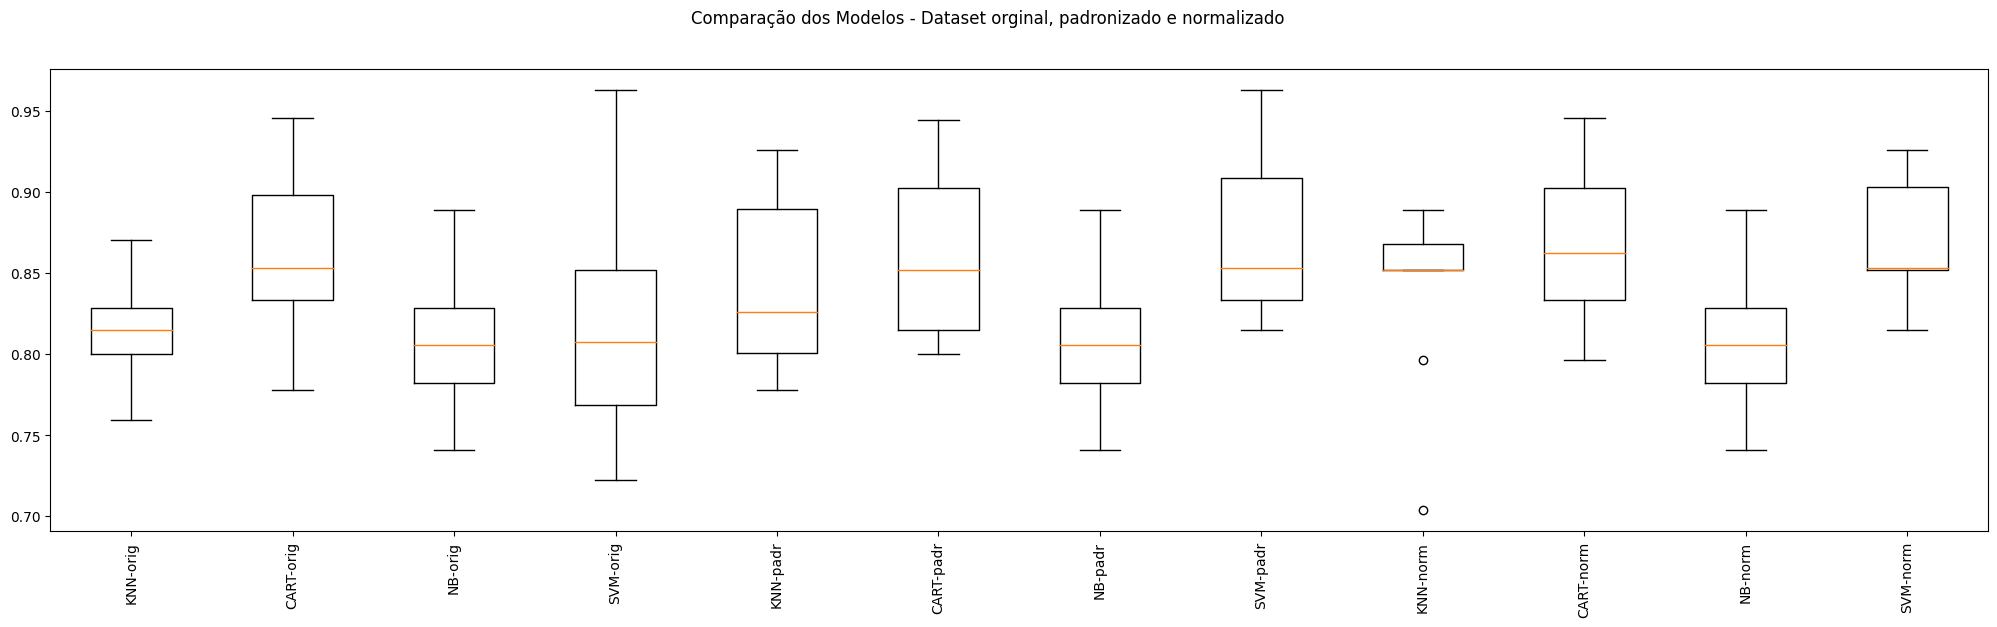

In [ ]:
np.random.seed(7)  # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Utilizando os conjuntos downsapled para treinamento e teste nos pipelines
X_train = X_train_downsampled
y_train = y_train_downsampled

##### Etapa de geraçao do Scaler
from sklearn.preprocessing import StandardScaler
from joblib import dump
from google.colab import files

atributos = [' TemperaturaDoAr[°C]', ' TemperaturaDoProcesso[°C]',
       ' VelocidadeDeRotacao[rpm]', ' Torque[Nm]',
       ' DesgasteDaFerramenta[min]']
entrada = pd.DataFrame(X_train_downsampled, columns=atributos)

# Extrair as features
X_train = entrada.values.astype(float)

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento e transformar os dados
X_train_scaled = scaler.fit_transform(X_train)

# Salvar o scaler em um arquivo
dump(scaler, 'scaler.joblib')

# Fazer o download do arquivo
files.download('scaler.joblib')

#####


# Criando os elementos do pipeline
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())  # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25, 6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Otimização dos hiperparâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

# Utilizando os conjuntos downsapled para treinamento e teste no ajuste dos hiperparâmetros do SVM
X_train = X_train_downsampled
y_train = y_train_downsampled

# Definindo os componentes do pipeline
svm = SVC()
pipelines = []
pipelines.append(('svm-orig', Pipeline(steps=[('SVM', svm)])))
pipelines.append(('svm-padr', Pipeline(steps=[('StandardScaler', StandardScaler()), ('SVM', svm)])))
pipelines.append(('svm-norm', Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('SVM', svm)])))

param_grid = {'SVM__C': [0.1, 0.5, 1.0, 2.0, 10], 'SVM__kernel': ["linear", "poly", "rbf"]}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: svm-orig - Melhor: 0.824545 usando {'SVM__C': 1.0, 'SVM__kernel': 'rbf'}
Sem tratamento de missings: svm-padr - Melhor: 0.883636 usando {'SVM__C': 10, 'SVM__kernel': 'rbf'}
Sem tratamento de missings: svm-norm - Melhor: 0.878215 usando {'SVM__C': 1.0, 'SVM__kernel': 'poly'}


Avaliação do modelo com o conjunto de testes



In [ ]:
# Preparação do modelo usando SVM
scaler = StandardScaler().fit(X_train)  # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train)  # aplicação da padronização no conjunto de treino
model = SVC(kernel='rbf', C=1.0)  # SVM com kernel RBF e parâmetro C padrão
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)  # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8897058823529411


Finalização do Modelo

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X_downsampled)  # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X_downsampled)  # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y_downsampled)

SVC()

Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'temp': [20, 25, 30],
        'proc': [30, 35, 40],
        'vel': [1250, 1500, 1750],
        'tor': [30, 40, 50],
        'des': [10, 20, 30],
        }

atributos = ['temp', 'proc', 'vel', 'tor', 'des']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:, 0:5].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X_downsampled
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-3.30692658 -0.68270429 -0.90378911 -1.03325362 -1.66608555]
 [-0.89399479 -0.50161137 -0.07049791 -0.34429593 -1.52170851]
 [ 1.518937   -0.32051845  0.76279329  0.34466175 -1.37733146]]


Teste com dados reais

In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0 0 0]


Salvando o modelo treinado em um arquivo .pkl

In [ ]:
import pickle
from google.colab import files

# Salvar o modelo usando pickle
with open('classificador.pkl', 'wb') as pickle_out:
    pickle.dump(model, pickle_out)

# Baixar o arquivo para o ambiente local
files.download('classificador.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>